In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
data = pd.read_csv("attack_edge_result.csv",sep=";",names=["theta","t","SPC","LL","HL"])

In [3]:
data

,theta,t,SPC,LL,HL
0,0.1,1.00,0,0,0
1,0.1,1.02,0,0,0
2,0.1,1.04,0,0,0
3,0.1,1.06,0,0,0
4,0.1,1.08,0,0,6584
...,...,...,...,...,...
595,2.5,1.90,6327,6584,6584
596,2.5,1.92,6327,6584,6584
597,2.5,1.94,6327,6584,6584
598,2.5,1.96,6327,6584,6584


In [4]:
for i in ["SPC","LL","HL"]:
    data[i] = (6594 - data[i]) / 6594

In [5]:
def data_smooth(data):
    to_be_smoothed = data[["SPC","LL","HL"]]
    for index in range(len(to_be_smoothed)):
        if index > 0:
            for col in ["SPC","LL","HL"]:
                if to_be_smoothed.iloc[index][col] > to_be_smoothed.iloc[index - 1][col]:
                    to_be_smoothed.iloc[index][col] = to_be_smoothed.iloc[index - 1][col]
    
    return to_be_smoothed

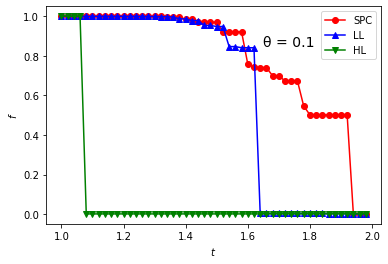

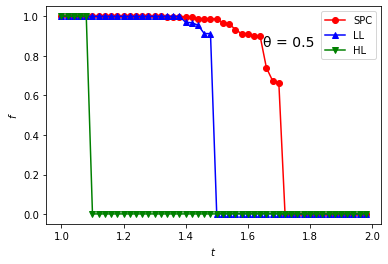

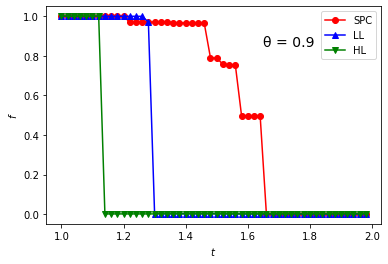

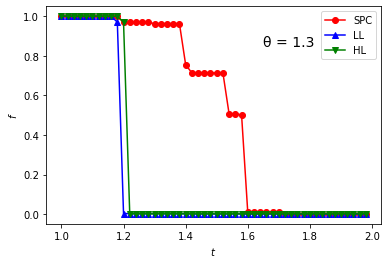

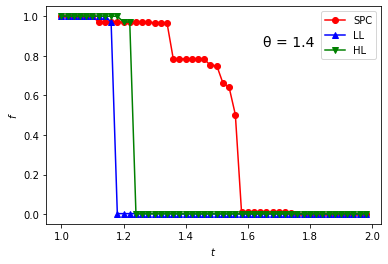

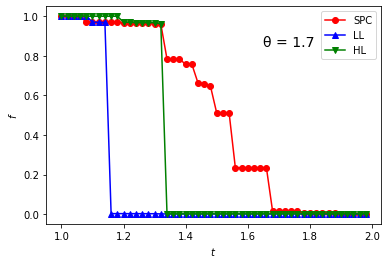

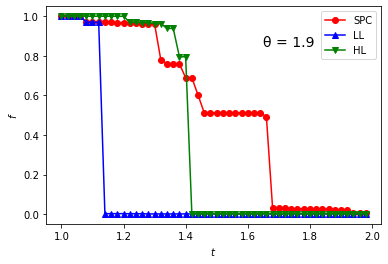

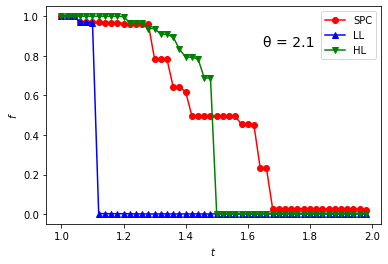

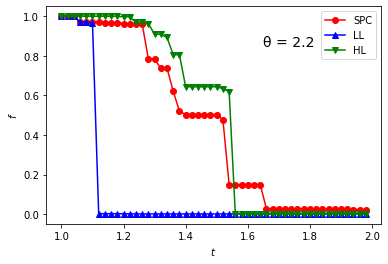

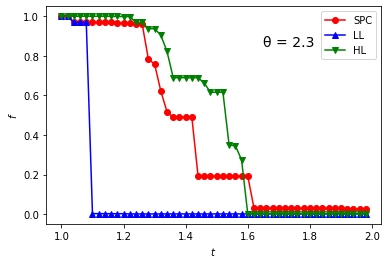

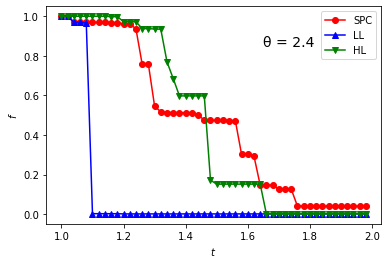

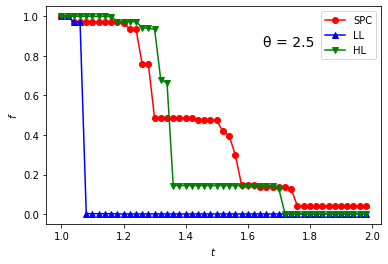

In [6]:
for theta in [0.1,0.5,0.9,1.3,1.4,1.7,1.9,2.1,2.2,2.3,2.4,2.5]:
    d_plot = deepcopy(data[data["theta"] == theta])
    
    smooted_data = data_smooth(d_plot)
    plt.plot(d_plot['t'],smooted_data ["SPC"],color="r",marker="o",label = "SPC")
    plt.plot(d_plot['t'],smooted_data ["LL"],color="b",marker = "^",label = "LL")
    plt.plot(d_plot['t'],smooted_data ["HL"],color ="g",marker = "v",label="HL")

    plt.xlabel("$t$")
    plt.ylabel("$f$")
    plt.text(1.65,0.85,f"\u03B8 = {theta}",fontsize = 14)
    plt.legend()
    plt.savefig(f'theta={theta}.png', dpi=300)
    plt.show()
    
    

In [27]:
t_c = []
for theta in [0.1,0.5,0.9,1.3,1.4,1.7,1.9,2.1,2.2,2.3,2.4,2.5]:
    d_plot = deepcopy(data[data["theta"] == theta])
    temp = []
    for col in ["SPC","LL","HL"]:
        for index in range(len(d_plot)):
            if d_plot.iloc[index][col] - 0 <= 0.05:
                temp.append(d_plot.iloc[index]["t"])
                break
    t_c.append(temp)
    

In [28]:
t_c

[[1.94, 1.64, 1.08],
 [1.72, 1.5, 1.1],
 [1.66, 1.3, 1.14],
 [1.6, 1.2, 1.22],
 [1.58, 1.18, 1.24],
 [1.68, 1.16, 1.34],
 [1.68, 1.14, 1.42],
 [1.68, 1.12, 1.5],
 [1.66, 1.12, 1.56],
 [1.62, 1.1, 1.6],
 [1.76, 1.1, 1.66],
 [1.76, 1.08, 1.72]]

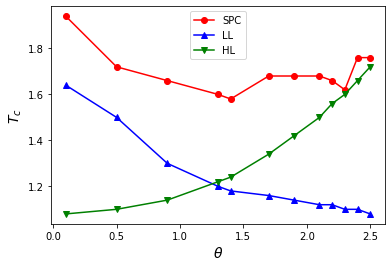

In [31]:
theta = [0.1,0.5,0.9,1.3,1.4,1.7,1.9,2.1,2.2,2.3,2.4,2.5]

t_c = np.array(t_c)
plt.plot(theta,t_c[:,0],color="r",marker="o",label = "SPC")
plt.plot(theta,t_c[:,1],color="b",marker = "^",label = "LL")
plt.plot(theta,t_c[:,2],color ="g",marker = "v",label="HL")


plt.xlabel("$\u03B8$",fontsize =14)
plt.ylabel("$T_{c}$",fontsize = 14)
#plt.text(1.65,0.85,f"\u03B8 = {theta}",fontsize = 14)
plt.legend()
plt.savefig(f'theta={theta}.png', dpi=300)
plt.show()